# DIABETE PREDICTION
This has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh, and approved by a doctor.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# => DATA PREPROCESSING

In [13]:
df = pd.read_csv("diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [15]:
def desc_cols(cols):
    for col in cols:
        print(col, '\n')
        print(df[col].describe())
        print('-'*30)
        print(df[col].value_counts())
        print( '\n' + '='*50 + '\n')

desc_cols(df.columns)

Age 

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64
------------------------------
35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: Age, dtype: int64


Gender 

count      520
unique       2
top       Male
freq       328
Name: Gender, dtype: object
------------------------------
Male      328
Female    192
Name: Gender, dtype: int64


Polyuria 

count     520
unique      2
top        No
freq      262
Name: Polyuria, dtype: object
----------

In [16]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [17]:
 cleanup_nums = {
    "Gender": {"Male": 0, "Female": 1},
    "Polyuria": {"No": 0, "Yes": 1},
    "Polydipsia": {"No": 0, "Yes": 1},
    "sudden weight loss": {"No": 0, "Yes": 1},
    "weakness": {"No": 0, "Yes": 1},
    "Genital thrush": {"No": 0, "Yes": 1},
    "Polyphagia": {"No": 0, "Yes": 1},
    "Genital thrush": {"No": 0, "Yes": 1},
    "visual blurring": {"No": 0, "Yes": 1},
    "Itching": {"No": 0, "Yes": 1},
    "Irritability": {"No": 0, "Yes": 1},
    "delayed healing": {"No": 0, "Yes": 1},
    "partial paresis": {"No": 0, "Yes": 1},
    "muscle stiffness": {"No": 0, "Yes": 1},
    "Alopecia": {"No": 0, "Yes": 1},
    "Obesity": {"No": 0, "Yes": 1},
    "class": {"Negative": 0, "Positive": 1},
}
df_transf = df.replace(cleanup_nums)
df_transf

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


# => VISUALIZATION

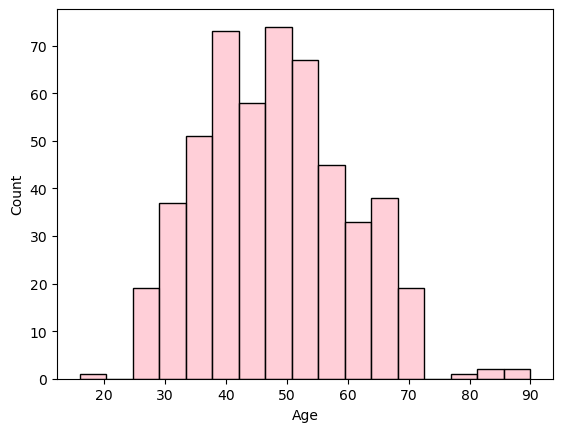

In [18]:
fig = sns.histplot(df, x="Age", color="pink")

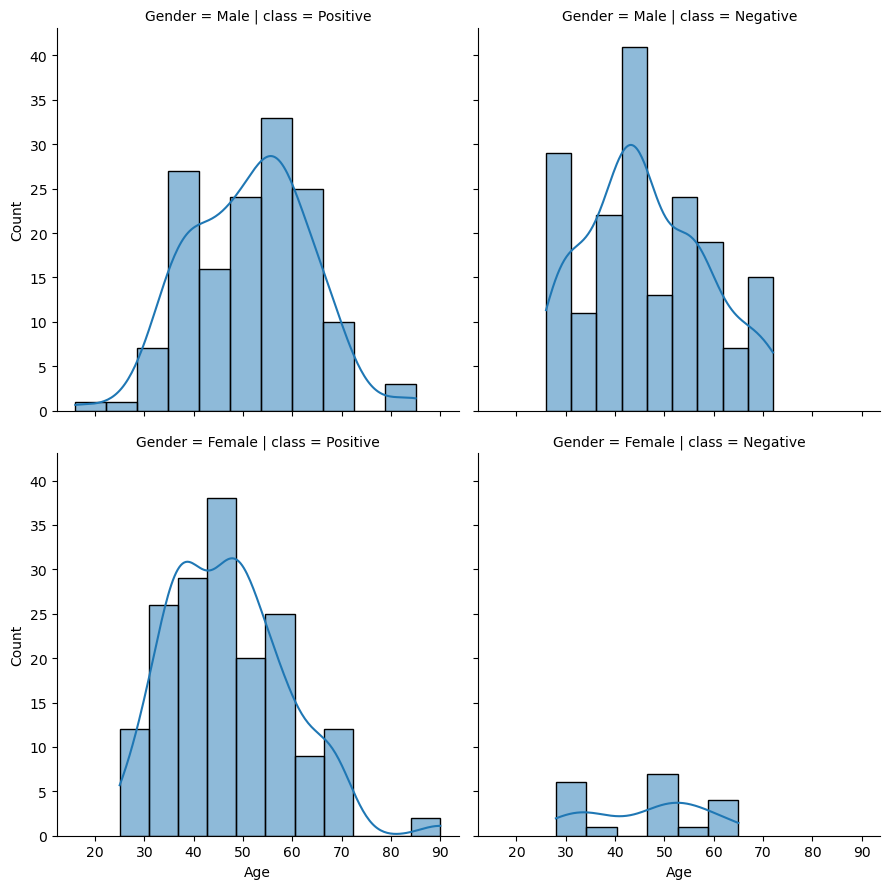

In [19]:
grid = sns.FacetGrid(df, col="class", row="Gender", height=4.5)
grid.map(sns.histplot, "Age", alpha=.5, kde=True)

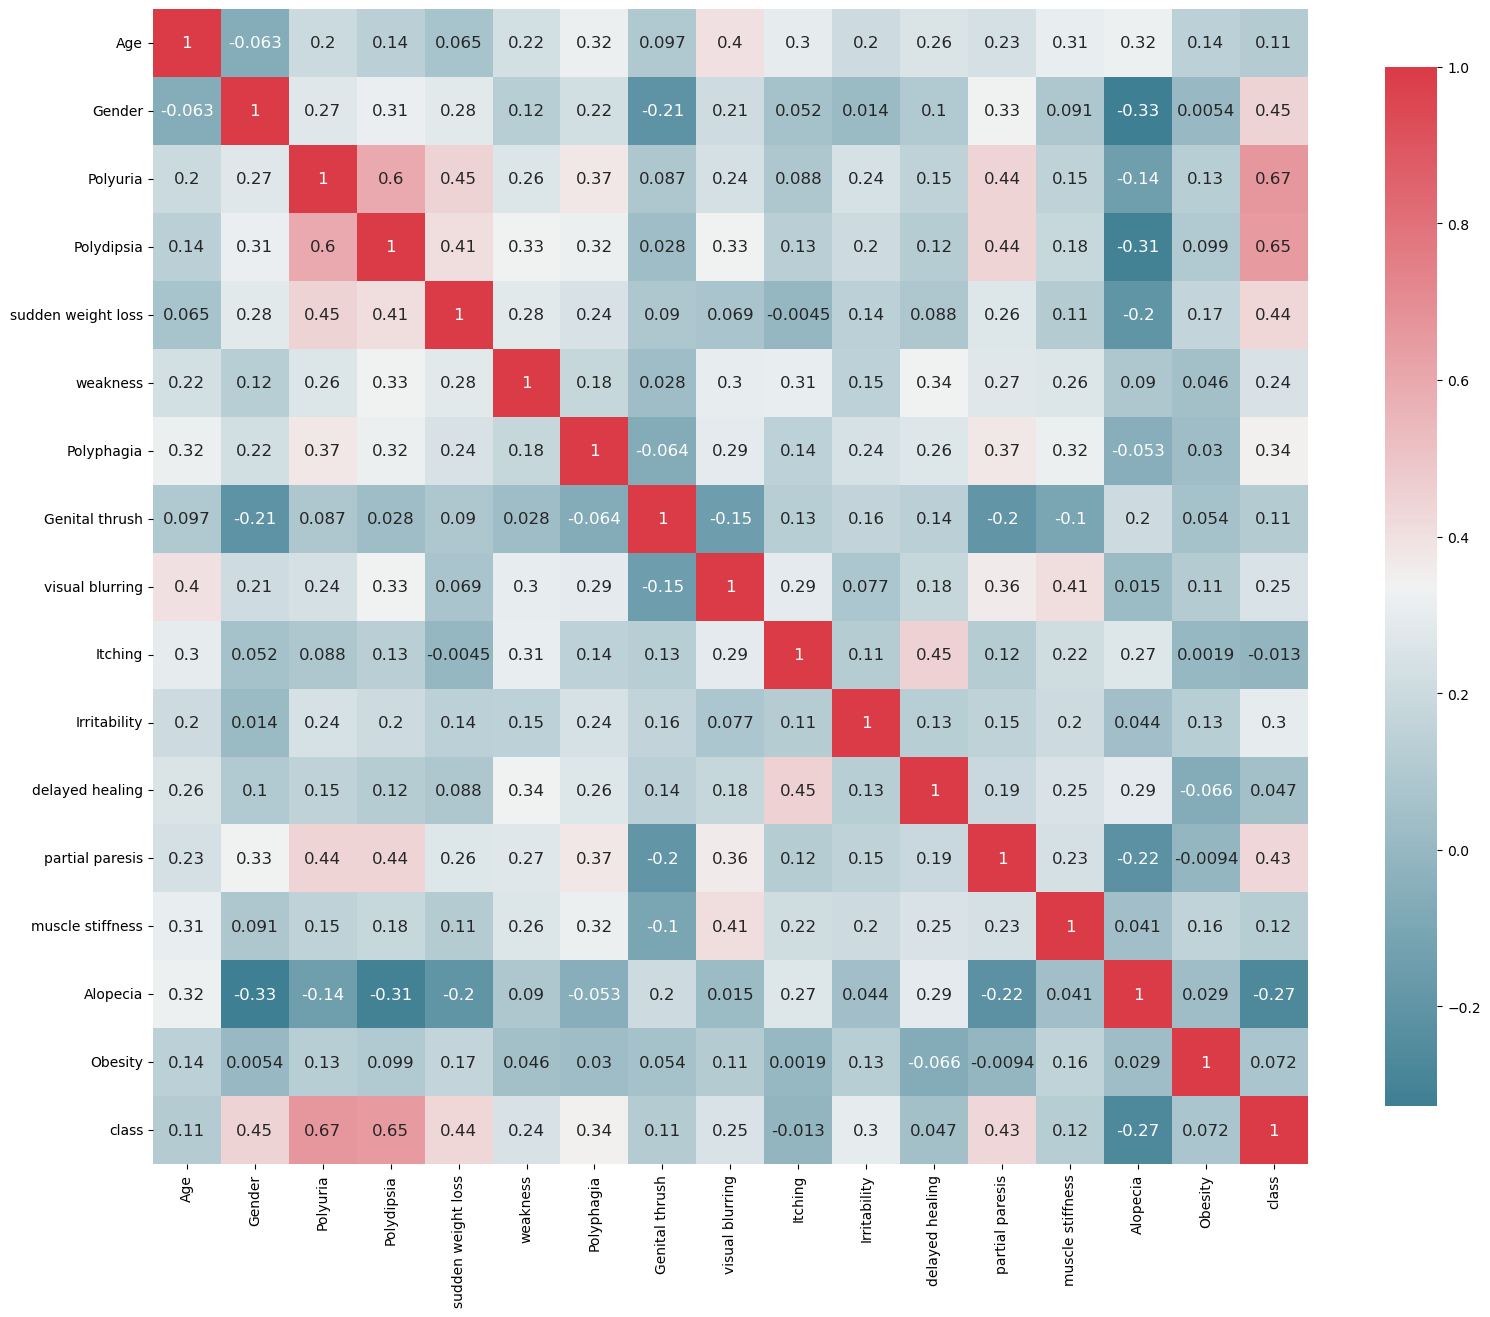

In [20]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots(figsize = (20 , 15))
    cmap = sns.diverging_palette(220 , 10 , as_cmap = True)
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(df_transf)

In [23]:
def apply_model(X, y, model, x=X):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    pipe = make_pipeline(StandardScaler(), model)
    pipe.fit(X_train, y_train)
    y_pred  = pipe.predict(X_test)
    if isinstance(model, LogisticRegression):
        confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
        sns.heatmap(confusion_matrix, annot=True)
        print(metrics.classification_report(y_test, y_pred))
    
    return {"score" : round(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean(), 2),
           "prediction" : pipe.predict(x)}

In [24]:
X = df_transf.drop(['class'], axis=1)
y = df_transf['class']
algo_scores = {}

# ==> LOGISTIC REGRESSION

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.95      0.97      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104

Accuracy: 0.91


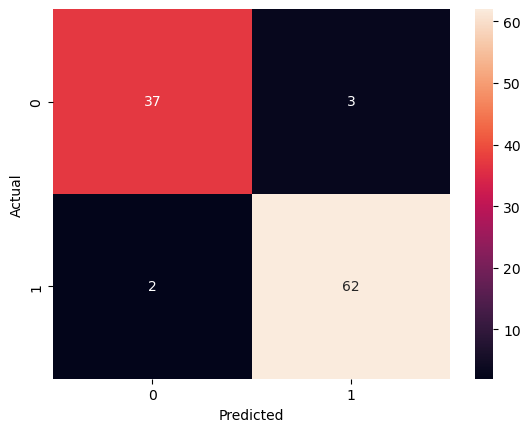

In [25]:
model = LogisticRegression()
result = apply_model(X, y, model)
algo_scores['LogisticRegression'] = result['score']
print(f"Accuracy: {result['score']}")

# ==> KNN

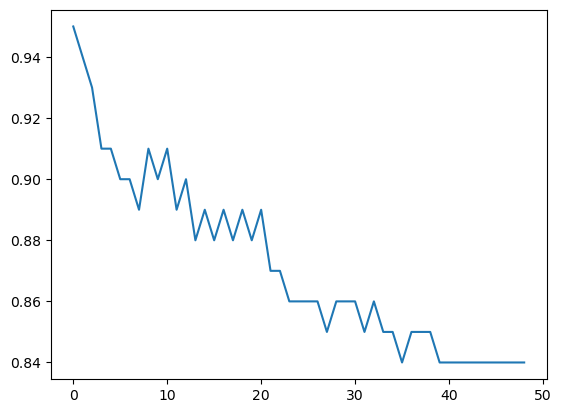

In [26]:
knn_scores = []
for k in range(1, 50):
    model = KNeighborsClassifier(k)
    result = apply_model(X, y, model)
    knn_scores.append(result['score'])

plt.plot(knn_scores)

5 is the optimal value of k.

In [27]:
model = KNeighborsClassifier(5)
result = apply_model(X, y, model)
algo_scores['KNeighborsClassifier'] = result['score']

# ==> RANDOM FOREST

In [28]:
model = RandomForestClassifier(n_estimators=10)
result = apply_model(X, y, model)
algo_scores['RandomForestClassifier'] = result['score']
print(f"Accuracy: {result['score']}")

Accuracy: 0.97


In [20]:
algo_scores

{'LogisticRegression': 0.91,
 'KNeighborsClassifier': 0.91,
 'RandomForestClassifier': 0.96}

The Random Forest algorithm is more accurate compare to the others.

# => MODEL

In [21]:
def diabete(X, y, model):
    
    #=== COLLECTING DATA
    
    x = []

    while True:
        age = input("Age : ")
        try:
            age = int(age)
            if age > 0:
                x.append(age)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")

    while True:
        gender = input("Gender :\n 0. Male\n 1. Female\n")
        try:
            gender = int(gender)
            if gender == 0 or gender == 1:
                x.append(gender)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")

    while True:
        polyuria = input("Polyuria :\n 0. No\n 1. Yes\n")
        try:
            polyuria = int(polyuria)
            if polyuria == 0 or polyuria == 1:
                x.append(polyuria)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")

    while True:
        polydipsia = input("Polydipsia :\n 0. No\n 1. Yes\n")
        try:
            polydipsia = int(polydipsia)
            if polydipsia == 0 or polydipsia == 1:
                x.append(polydipsia)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")   

    while True:
        sudden_weight_loss = input("Sudden weight loss :\n 0. No\n 1. Yes\n")
        try:
            sudden_weight_loss = int(sudden_weight_loss)
            if sudden_weight_loss == 0 or sudden_weight_loss == 1:
                x.append(sudden_weight_loss)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...") 

    while True:
        weakness = input("Weakness :\n 0. No\n 1. Yes\n")
        try:
            weakness = int(weakness)
            if weakness == 0 or weakness == 1:
                x.append(weakness)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...") 
    
    while True:
        polyphagia = input("Polyphagia :\n 0. No\n 1. Yes\n")
        try:
            polyphagia = int(polyphagia)
            if polyphagia == 0 or polyphagia == 1:
                x.append(polyphagia)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")
        
    while True:
        genital_thrush = input("Genital thrush :\n 0. No\n 1. Yes\n")
        try:
            genital_thrush = int(genital_thrush)
            if genital_thrush == 0 or genital_thrush == 1:
                x.append(genital_thrush)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")
            
    while True:
        visual_blurring = input("Visual blurring :\n 0. No\n 1. Yes\n")
        try:
            visual_blurring = int(visual_blurring)
            if visual_blurring == 0 or visual_blurring == 1:
                x.append(visual_blurring)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")
                
    while True:
        itching = input("Itching :\n 0. No\n 1. Yes\n")
        try:
            itching = int(itching)
            if itching == 0 or itching == 1:
                x.append(itching)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")
                    
    while True:
        irritability = input("Irritability :\n 0. No\n 1. Yes\n")
        try:
            irritability = int(irritability)
            if irritability == 0 or irritability == 1:
                x.append(irritability)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")
                        
    while True:
        delayed_healing = input("Delayed healing :\n 0. No\n 1. Yes\n")
        try:
            delayed_healing = int(delayed_healing)
            if delayed_healing == 0 or delayed_healing == 1:
                x.append(delayed_healing)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")
                           
    while True:
        partial_paresis = input("Partial paresis :\n 0. No\n 1. Yes\n")
        try:
            partial_paresis = int(partial_paresis)
            if partial_paresis == 0 or partial_paresis == 1:
                x.append(partial_paresis)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")
                               
    while True:
        muscle_stiffness = input("Muscle stiffness :\n 0. No\n 1. Yes\n")
        try:
            muscle_stiffness = int(muscle_stiffness)
            if muscle_stiffness == 0 or muscle_stiffness == 1:
                x.append(muscle_stiffness)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")
                                   
    while True:
        alopecia = input("Alopecia :\n 0. No\n 1. Yes\n")
        try:
            alopecia = int(alopecia)
            if alopecia == 0 or alopecia == 1:
                x.append(alopecia)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")
                                       
    while True:
        obesity = input("Obesity :\n 0. No\n 1. Yes\n")
        try:
            obesity = int(obesity)
            if obesity == 0 or obesity == 1:
                x.append(obesity)
                break
            else:
                raise Exception()
        except:
            print("Error! Retry...")
            
    x = np.array(x).reshape(1, 16)
    model = RandomForestClassifier(n_estimators=10)
    result = apply_model(X, y, model, x)
    
    if result['prediction'][0] == 0:
        print("="*50 + "\n\n => Diabete: NEGATIVE <=")
    else:
        print("="*50 + "\n\n => Diabete: POSITIVE <=")

# ==> TESTING

In [22]:
diabete(X, y, RandomForestClassifier(n_estimators=10))

Age : 40
Gender :
 0. Male
 1. Female
1
Polyuria :
 0. No
 1. Yes
1
Polydipsia :
 0. No
 1. Yes
0
Sudden weight loss :
 0. No
 1. Yes
1
Weakness :
 0. No
 1. Yes
0
Polyphagia :
 0. No
 1. Yes
1
Genital thrush :
 0. No
 1. Yes
0
Visual blurring :
 0. No
 1. Yes
1
Itching :
 0. No
 1. Yes
0
Irritability :
 0. No
 1. Yes
1
Delayed healing :
 0. No
 1. Yes
1
Partial paresis :
 0. No
 1. Yes
0
Muscle stiffness :
 0. No
 1. Yes
0
Alopecia :
 0. No
 1. Yes
1
Obesity :
 0. No
 1. Yes
0

 => Diabete: POSITIVE <=


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
